In [1]:
%load_ext autoreload
%autoreload 2

from sklearn.model_selection import train_test_split
from src.utilities import data_generation as dg
from src.metrics import true_ece
import scipy.stats as st
import numpy as np
import tensorflow as tf

In [2]:
dist1_1 = st.multivariate_normal(mean=[10, 10], cov=1, allow_singular=True)
dist1_2 = st.multivariate_normal(mean=[6, -6], cov=1.7, allow_singular=True)

In [3]:
dist2_1 = st.multivariate_normal(mean=[-10, 10], cov=1, allow_singular=True)
dist2_2 = st.multivariate_normal(mean=[-6, -6], cov=1.7, allow_singular=True)

In [4]:
class_object1 = dg.ClassObject([dist1_1, dist1_2], None)
class_object2 = dg.ClassObject([dist2_1, dist2_2], None)

In [5]:
test = dg.DataGeneration([class_object1, class_object2], n_uninformative_features=0, title="dg-test")

In [6]:
n_samples_per_class_and_dist = 1000

samples, labels = test.generate_data(n_samples_per_class_and_dist)

<module 'matplotlib.pyplot' from 'D:\\ProgrammingProjects\\PyCharm\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

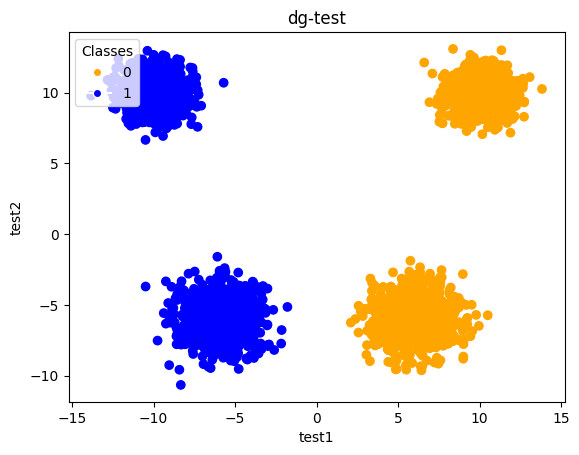

In [7]:
colormap = np.array(['orange', 'blue', 'red'])

test.scatter2d(0, 1, colormap=colormap, savePath="./plots/balanced_easy_dicotomy_few_features.png", axis1_label="test1", axis2_label="test2")

In [8]:
X_train, X_test, y_train, y_test = train_test_split(samples, labels, test_size=.2)

In [9]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [10]:
model = tf.keras.Sequential()

In [11]:
model.add(tf.keras.layers.Dense(50, activation="tanh"))

In [12]:
model.add(tf.keras.layers.Dense(2,activation="softmax"))

In [13]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [14]:
model.fit(X_train.reshape(-1, 2), y_train, epochs=15, batch_size=1000)

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5481 - loss: 0.5170  
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9984 - loss: 0.2675 
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1771 
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1294 
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0974 
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0760 
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0603 
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0485 
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0398 
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0329 
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0271 
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0224 


In [15]:
model.evaluate(X_test.reshape(-1, 2), y_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 1.0000 - loss: 0.0119


[0.011377859860658646, 1.0]

In [16]:
predictions = model.predict(X_test.reshape(-1,2))

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [17]:
y_test = np.argmax(y_test, axis=1)

In [18]:
p_test_true = np.array([[test.cond_prob(x, k=0), test.cond_prob(x, k=1)] for x in X_test])

In [19]:
true_ece.true_ece(predictions, p_test_true)

0.011280819692678641

In [20]:
true_ece.calibration_error_summary(predictions, y_test, n_bins=np.array([10, 20, 50]))

(array([[1.130e-02, 1.130e-02, 1.130e-02],
        [1.300e-02, 1.200e-02, 1.200e-02],
        [5.875e+01, 5.775e+01, 4.300e+01],
        [1.130e-02, 1.130e-02, 1.130e-02]]),
 0.0113,
 0.006)